# 📘 PHẦN 1: GIỚI THIỆU CƠ SỞ DỮ LIỆU
- Đọc file dữ liệu `Mobiles_Dataset.csv`
- Kiểm tra kích thước và tên các cột
- Hiển thị vài dòng đầu tiên để quan sát sơ bộ

In [35]:
# Nhập các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.frequent_patterns import apriori, association_rules

# Cấu hình hiển thị đẹp hơn
plt.style.use('seaborn-v0_8-whitegrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Tạo thư mục để lưu biểu đồ
import os
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

print("Môi trường đã được thiết lập!")

Môi trường đã được thiết lập!


In [36]:
# Đọc dữ liệu (Có thể cần điều chỉnh delimiter nếu không phải dạng chuẩn)
df = pd.read_csv('Mobiles_Dataset.csv', encoding='latin1')
# Kiểm tra kích thước dữ liệu
print(f"Kích thước dữ liệu: {df.shape}")

# Xem 5 dòng đầu tiên để kiểm tra cấu trúc
print("\nDữ liệu gốc (5 dòng đầu):")
print(df.head())

# Đặt tên cho các cột dựa trên dữ liệu mẫu
column_names = ['Brand', 'Model', 'Weight', 'RAM', 'FrontCamera', 
                'RearCamera', 'Processor', 'Battery', 'ScreenSize', 
                'PKR_Price', 'INR_Price', 'CNY_Price', 'USD_Price', 
                'AED_Price', 'ReleaseYear']

# Đặt tên cột
df.columns = column_names

# Xem lại dữ liệu sau khi đặt tên cột
print("\nDữ liệu sau khi đặt tên cột (5 dòng đầu):")
print(df.head())

Kích thước dữ liệu: (930, 15)

Dữ liệu gốc (5 dòng đầu):
  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1      

## 1.2. Giới thiệu từng thuộc tính
Phân tích thông tin từng cột như kiểu dữ liệu, giá trị thiếu, giá trị duy nhất, min, max, trung bình...

In [37]:
# Hàm phân tích chi tiết cho mỗi cột
def analyze_column(df, column_name):
    print(f"\n--- Phân tích cột: {column_name} ---")
    print(f"Kiểu dữ liệu: {df[column_name].dtype}")
    print(f"Số giá trị null: {df[column_name].isnull().sum()}")
    print(f"Số giá trị unique: {df[column_name].nunique()}")
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Min: {df[column_name].min()}")
        print(f"Max: {df[column_name].max()}")
        print(f"Mean: {df[column_name].mean()}")
        print(f"Median: {df[column_name].median()}")
        print(f"Midrange: {(df[column_name].min() + df[column_name].max()) / 2}")
        
        # Mode có thể có nhiều giá trị
        mode_values = df[column_name].mode()
        if len(mode_values) > 0:
            print(f"Mode: {mode_values.values[0]}")
        
        # Five-number summary
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        print(f"Five-number summary: {df[column_name].min()} (Min), {q1} (Q1), {df[column_name].median()} (Median), {q3} (Q3), {df[column_name].max()} (Max)")
    else:
        # Phân tích giá trị phân loại
        value_counts = df[column_name].value_counts()
        value_percentage = df[column_name].value_counts(normalize=True) * 100
        print("Top 5 giá trị phổ biến:")
        for i, (value, count) in enumerate(value_counts.head().items()):
            print(f"  {value}: {count} ({value_percentage[value]:.2f}%)")
        
        # Mode cho dữ liệu phân loại
        print(f"Mode: {df[column_name].mode().values[0]}")

# Phân tích từng cột
for column in df.columns:
    analyze_column(df, column)


--- Phân tích cột: Brand ---
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 19
Top 5 giá trị phổ biến:
  Oppo: 129 (13.87%)
  Apple: 97 (10.43%)
  Honor: 91 (9.78%)
  Samsung: 88 (9.46%)
  Vivo: 86 (9.25%)
Mode: Oppo

--- Phân tích cột: Model ---
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 908
Top 5 giá trị phổ biến:
  Pad 128GB: 3 (0.32%)
  Pad 2 256GB: 3 (0.32%)
  K7x 128GB: 2 (0.22%)
  K10 5G 128GB: 2 (0.22%)
  K9x 256GB: 2 (0.22%)
Mode: Pad 128GB

--- Phân tích cột: Weight ---
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 148
Top 5 giá trị phổ biến:
  190g: 68 (7.31%)
  195g: 64 (6.88%)
  185g: 29 (3.12%)
  192g: 26 (2.80%)
  180g: 25 (2.69%)
Mode: 190g

--- Phân tích cột: RAM ---
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 11
Top 5 giá trị phổ biến:
  8GB: 308 (33.12%)
  6GB: 206 (22.15%)
  12GB: 193 (20.75%)
  4GB: 146 (15.70%)
  3GB: 34 (3.66%)
Mode: 8GB

--- Phân tích cột: FrontCamera ---
Kiểu dữ liệu: object
Số giá trị nu

### 📋 Bảng tổng hợp thông tin các thuộc tính

In [38]:

summary = pd.DataFrame(columns=["Tên cột", "Kiểu dữ liệu", "Số null", "Số giá trị unique"])

for col in df.columns:
    summary.loc[len(summary)] = [
        col,
        df[col].dtype,
        df[col].isnull().sum(),
        df[col].nunique()
    ]

summary


,Tên cột,Kiểu dữ liệu,Số null,Số giá trị unique
0,Brand,object,0,19
1,Model,object,0,908
2,Weight,object,0,148
3,RAM,object,0,11
4,FrontCamera,object,0,29
5,RearCamera,object,0,91
6,Processor,object,0,217
7,Battery,object,0,147
8,ScreenSize,object,0,97
9,PKR_Price,object,0,157


## 1.3. Tiền xử lý dữ liệu
Thực hiện làm sạch các cột như `Weight`, `RAM`, `FrontCamera`, `RearCamera`, chuyển đổi kiểu dữ liệu phù hợp.

In [39]:
# Bước 3: Tiền xử lý dữ liệu (đã sửa)
# Kiểm tra thông tin chi tiết về các cột (kiểu dữ liệu, missing values)
print("Thông tin về các cột:")
print(df.info())

# Tạo một bản sao cho quá trình xử lý
df_cleaned = df.copy()

# 1. Xử lý cột Weight
print("\nKiểm tra giá trị trong cột Weight:")
print(df_cleaned['Weight'].head())

# Loại bỏ 'g' và chuyển đổi sang số
df_cleaned['Weight'] = df_cleaned['Weight'].astype(str).str.extract('(\d+\.?\d*)').astype(float)

# 2. Xử lý cột RAM
print("\nKiểm tra giá trị trong cột RAM:")
print(df_cleaned['RAM'].head())

# Loại bỏ 'GB' và chuyển đổi sang số
df_cleaned['RAM'] = df_cleaned['RAM'].astype(str).str.extract('(\d+)').astype(float)

# 3. Xử lý cột FrontCamera và RearCamera
print("\nKiểm tra giá trị trong cột FrontCamera và RearCamera:")
print(df_cleaned[['FrontCamera', 'RearCamera']].head())

# Loại bỏ 'MP' và chuyển đổi sang số
df_cleaned['FrontCamera'] = df_cleaned['FrontCamera'].astype(str).str.extract('(\d+)').astype(float)
df_cleaned['RearCamera'] = df_cleaned['RearCamera'].astype(str).str.extract('(\d+)').astype(float)

# 4. Xử lý cột Battery
print("\nKiểm tra giá trị trong cột Battery:")
print(df_cleaned['Battery'].head())

# Loại bỏ 'mAh' và chuyển đổi sang số
df_cleaned['Battery'] = df_cleaned['Battery'].astype(str).str.extract('(\d+)').astype(float)

# 5. Xử lý cột ScreenSize
print("\nKiểm tra giá trị trong cột ScreenSize:")
print(df_cleaned['ScreenSize'].head())

# Loại bỏ 'inches' và chuyển đổi sang số
df_cleaned['ScreenSize'] = df_cleaned['ScreenSize'].astype(str).str.extract('(\d+\.?\d*)').astype(float)

# 6. Xử lý cột giá - SỬA LỖI để xử lý giá trị rỗng
price_columns = ['PKR_Price', 'INR_Price', 'CNY_Price', 'USD_Price', 'AED_Price']
for col in price_columns:
    print(f"\nKiểm tra giá trị trong cột {col}:")
    print(df_cleaned[col].head())
    
    # Loại bỏ ký tự không phải số, thay thế giá trị rỗng bằng NaN
    df_cleaned[col] = df_cleaned[col].astype(str).str.replace('[^0-9.]', '', regex=True)
    # Thay thế chuỗi rỗng bằng NaN
    df_cleaned[col] = df_cleaned[col].replace('', np.nan)
    # Chuyển đổi sang số
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Kiểm tra dữ liệu sau khi tiền xử lý
print("\nDữ liệu sau khi tiền xử lý (5 dòng đầu):")
print(df_cleaned.head())

# Kiểm tra thống kê mô tả của dữ liệu số
print("\nThống kê mô tả các cột số:")
print(df_cleaned.describe())

# Kiểm tra missing values
print("\nSố lượng missing values trong mỗi cột:")
print(df_cleaned.isnull().sum())

Thông tin về các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        930 non-null    object
 1   Model        930 non-null    object
 2   Weight       930 non-null    object
 3   RAM          930 non-null    object
 4   FrontCamera  930 non-null    object
 5   RearCamera   930 non-null    object
 6   Processor    930 non-null    object
 7   Battery      930 non-null    object
 8   ScreenSize   930 non-null    object
 9   PKR_Price    930 non-null    object
 10  INR_Price    930 non-null    object
 11  CNY_Price    930 non-null    object
 12  USD_Price    930 non-null    object
 13  AED_Price    930 non-null    object
 14  ReleaseYear  930 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 109.1+ KB
None

Kiểm tra giá trị trong cột Weight:
0    174g
1    174g
2    174g
3    203g
4    203g
Name: Weight, dtype: object

Kiể

# 📊 PHẦN 2: PHÂN TÍCH DỮ LIỆU & TRỰC QUAN HÓA

## 2.1.1. Trực quan hóa các thuộc tính số
Gồm Boxplot, Histogram, Q-Q plot, Scatter plot cho các cột liên quan

> 📌 Ví dụ: Hình 1 – Boxplot thể hiện phân bố RAM theo từng nhóm giá.

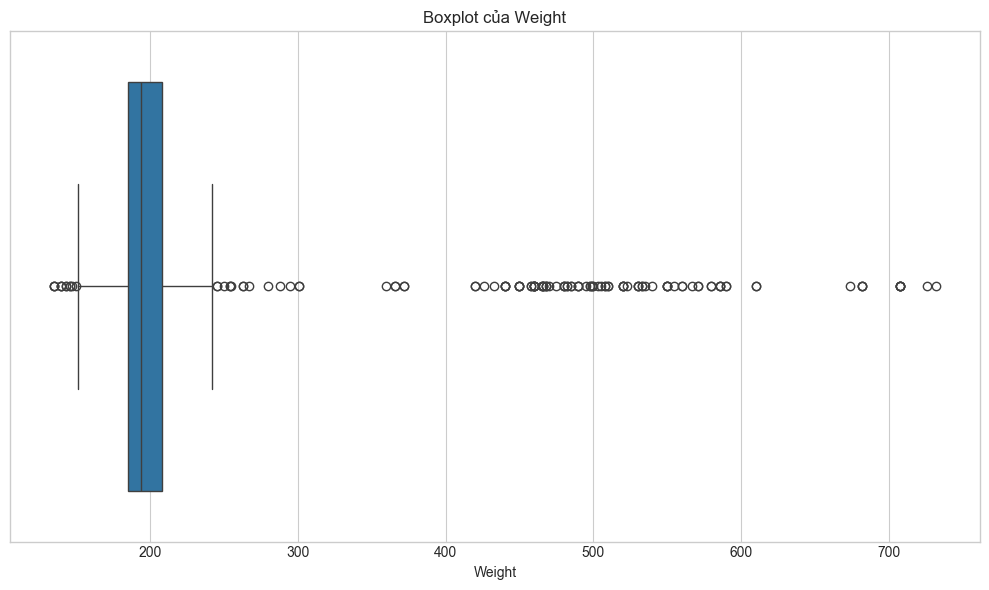

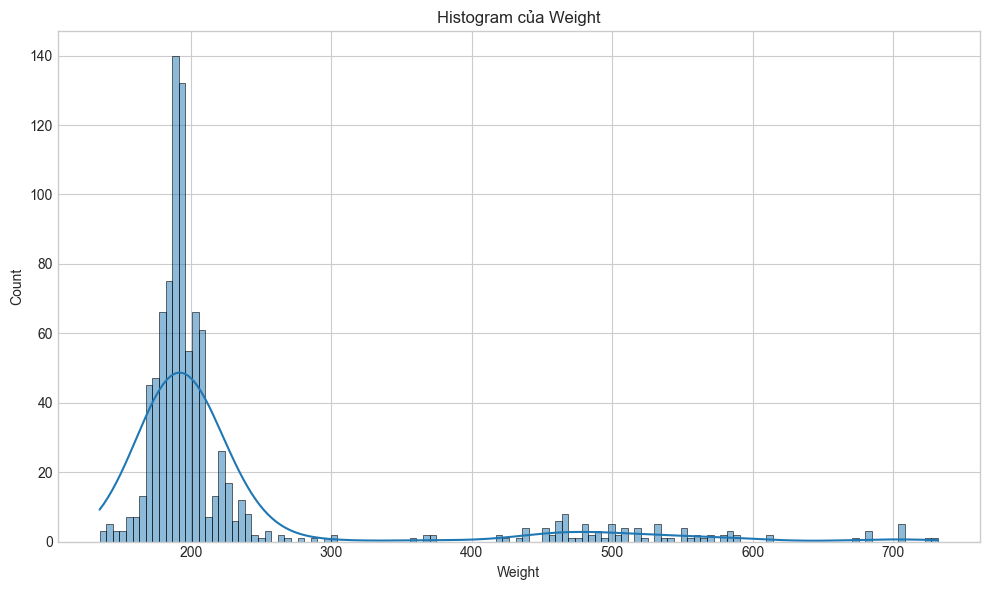

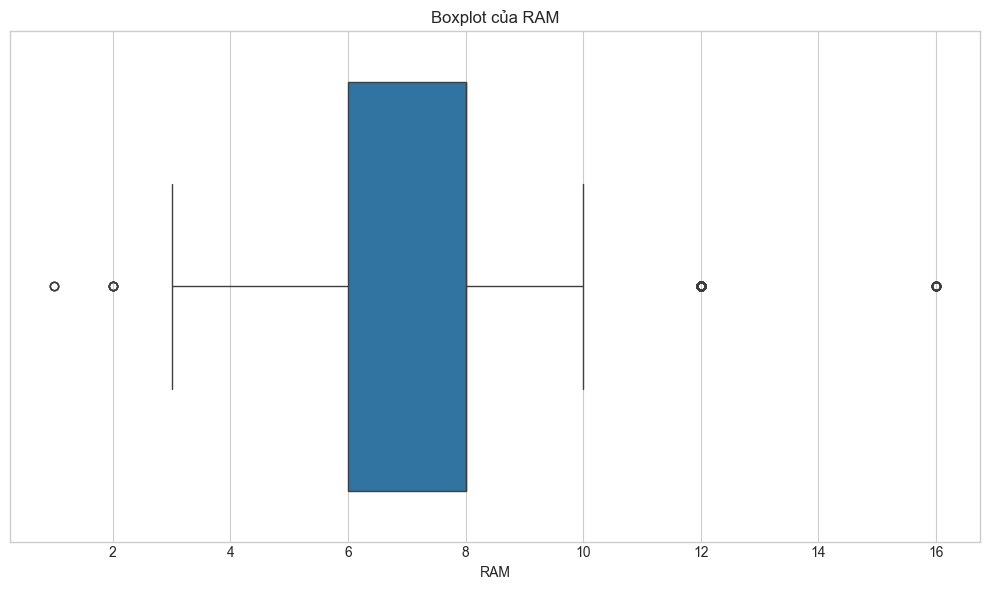

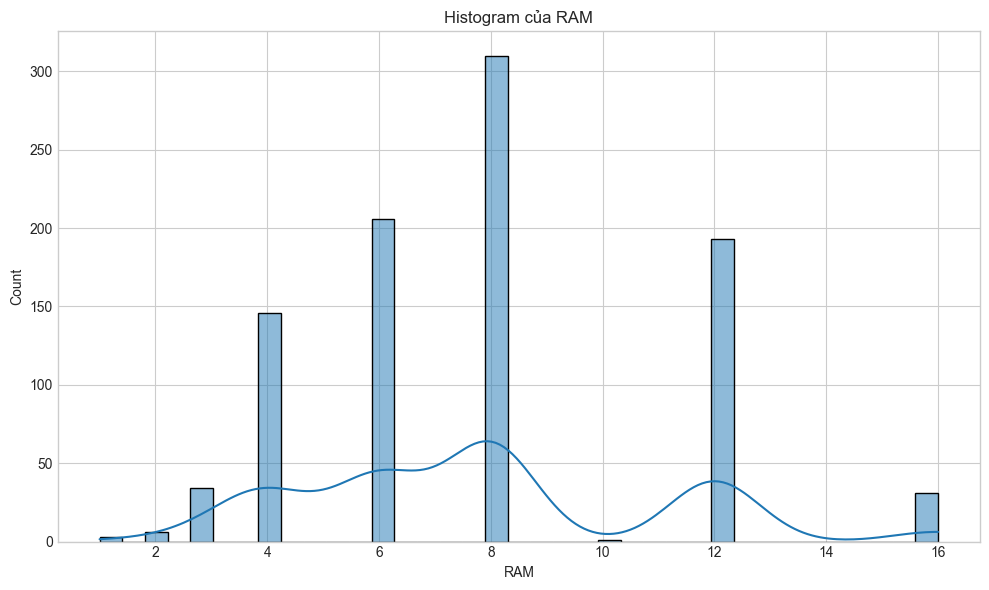

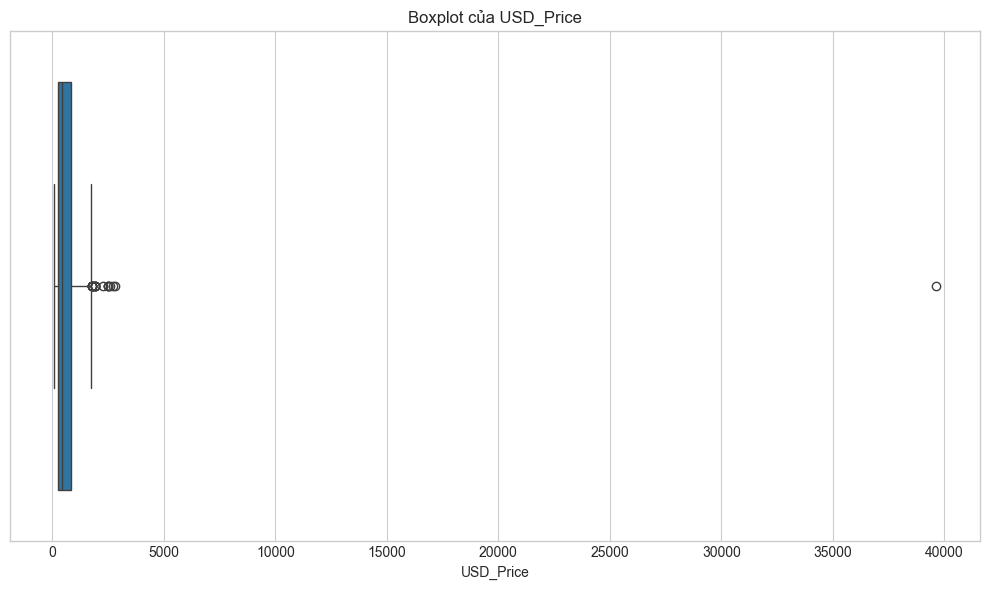

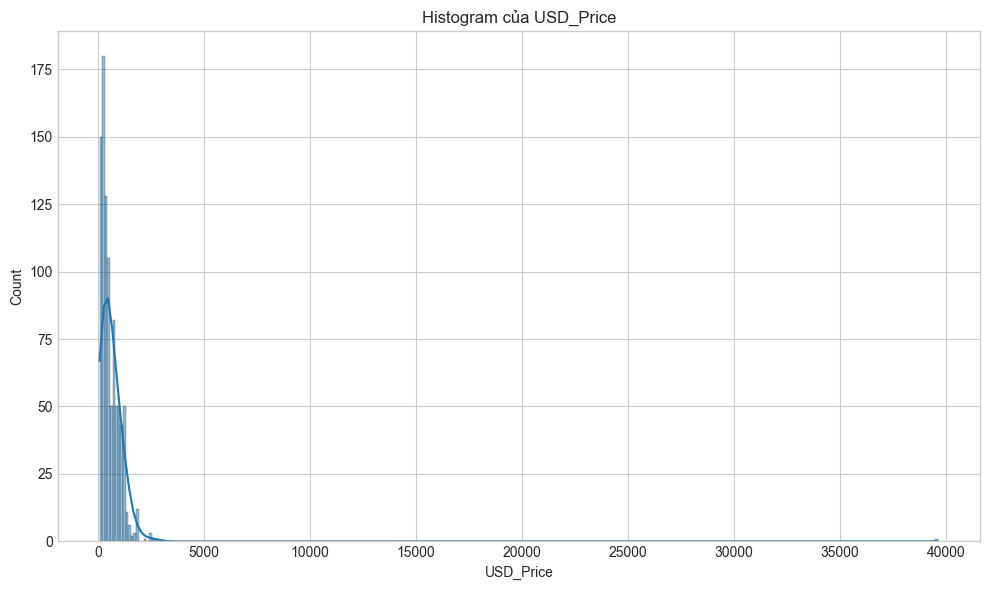

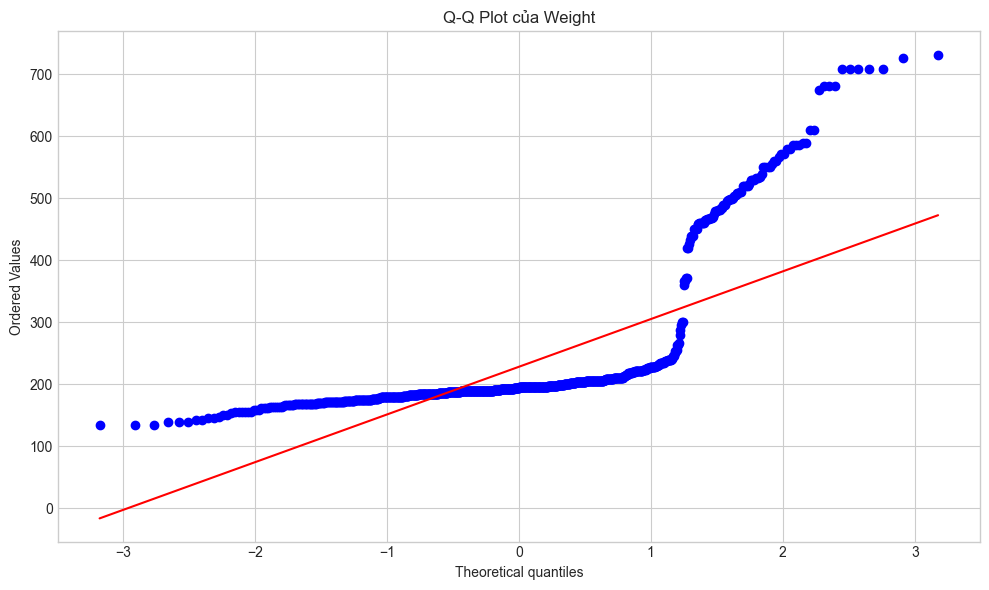

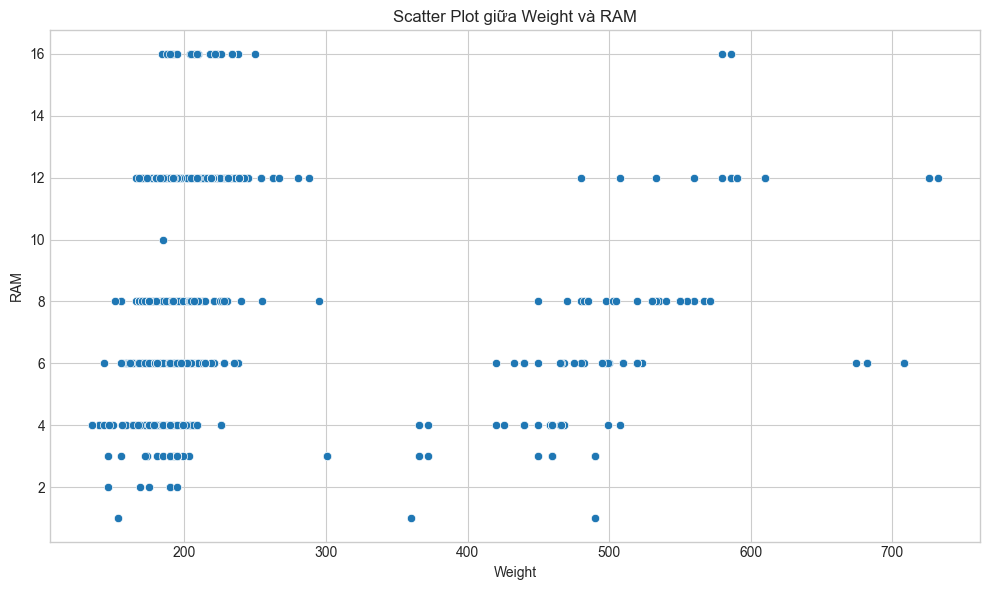

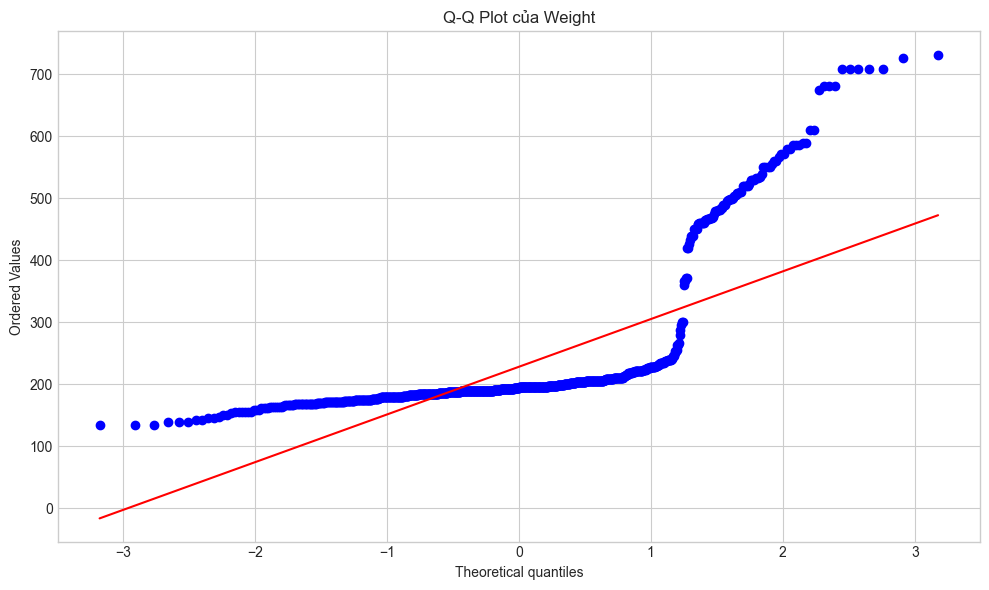

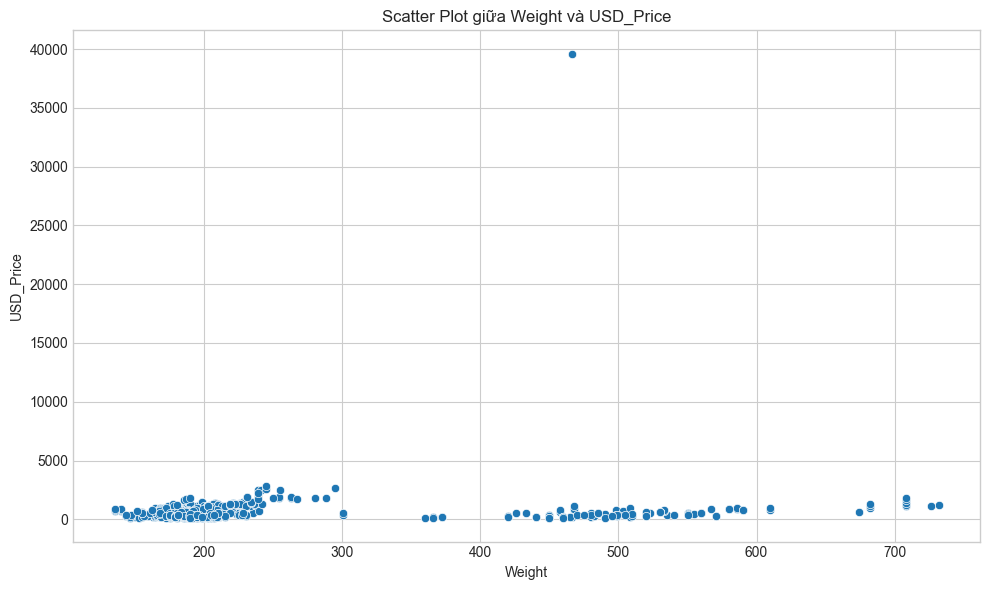

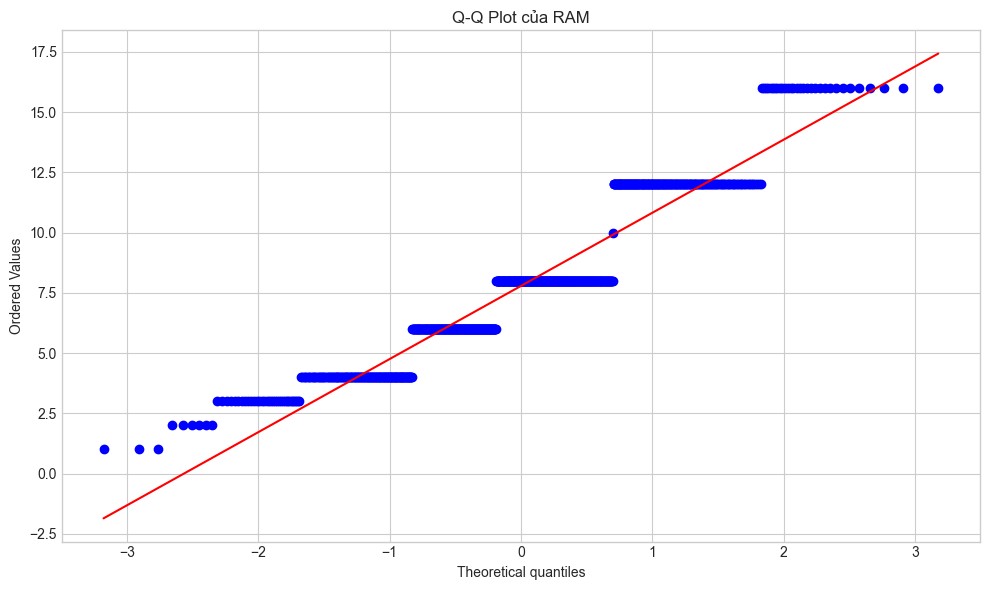

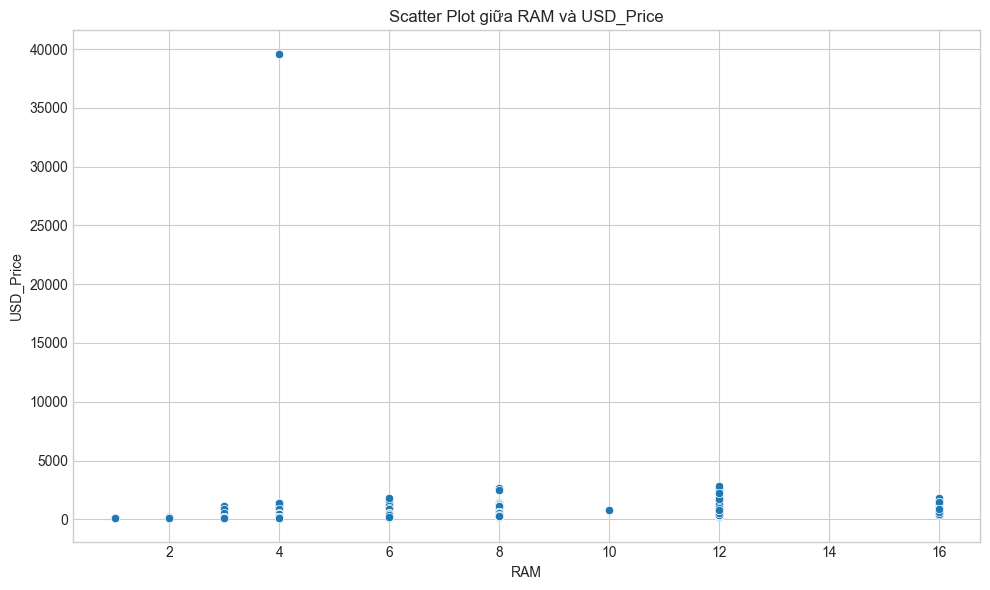

Đã tạo các biểu đồ cơ bản và lưu trong thư mục 'visualizations'


In [40]:
# 2.1.1. Boxplot, Q-Q Plot, Histogram, Scatter Plot
def visualize_numeric_columns(df, cols_to_visualize):
    for col in cols_to_visualize:
        # Boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot của {col}')
        plt.tight_layout()
        plt.show()
        plt.close()
        
        # Histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram của {col}')
        plt.tight_layout()
        plt.show()
        plt.close()
    
    # Q-Q Plot và Scatter Plot cho các cặp thuộc tính
    for i in range(len(cols_to_visualize)):
        for j in range(i+1, len(cols_to_visualize)):
            col1 = cols_to_visualize[i]
            col2 = cols_to_visualize[j]
            
            # Q-Q Plot
            plt.figure(figsize=(10, 6))
            stats.probplot(df[col1], dist="norm", plot=plt)
            plt.title(f'Q-Q Plot của {col1}')
            plt.tight_layout()
            plt.show()
            plt.close()
            
            # Scatter Plot
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.title(f'Scatter Plot giữa {col1} và {col2}')
            plt.tight_layout()
            plt.show()
            plt.close()

# Chọn 3 thuộc tính số cần phân tích
cols_to_visualize = ['Weight', 'RAM', 'USD_Price']
visualize_numeric_columns(df_cleaned, cols_to_visualize)

print("Đã tạo các biểu đồ cơ bản và lưu trong thư mục 'visualizations'")

## 2.1.2. Trực quan hóa theo nhóm danh nghĩa
Sử dụng `Brand` làm thuộc tính nhóm, vẽ boxplot các cột số theo nhóm

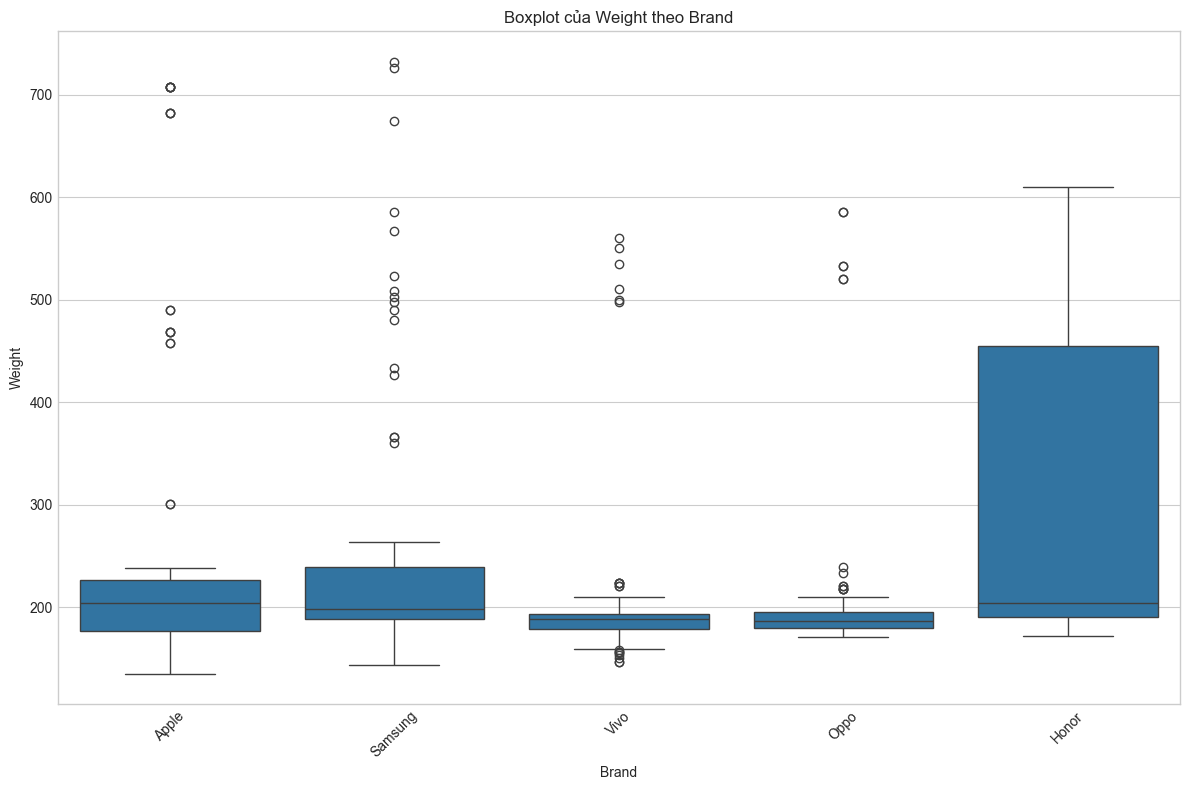

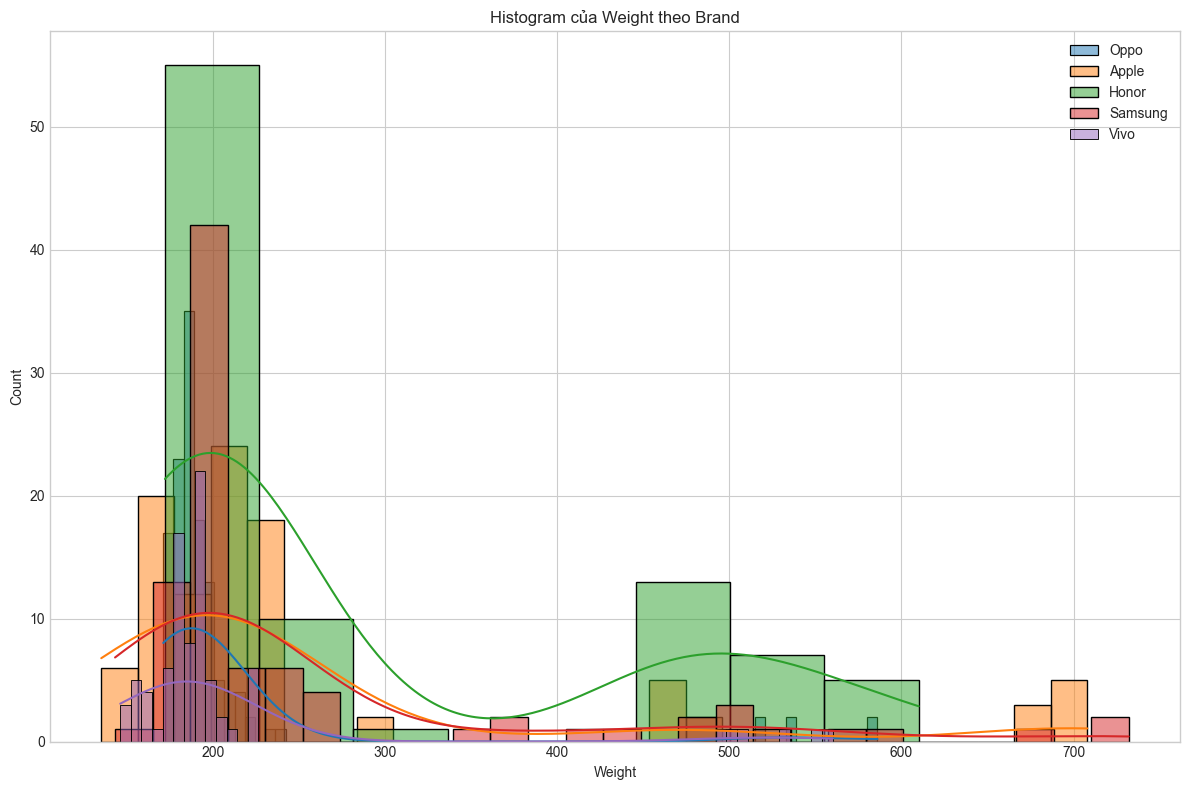

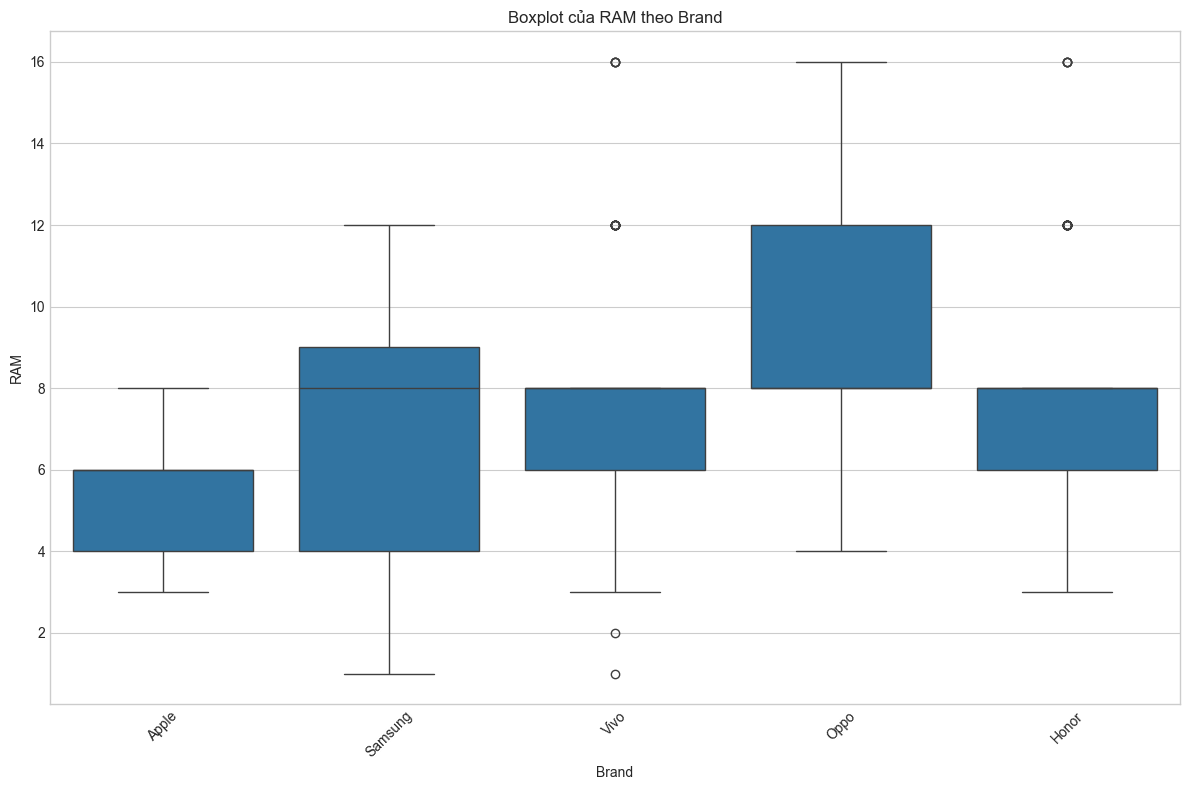

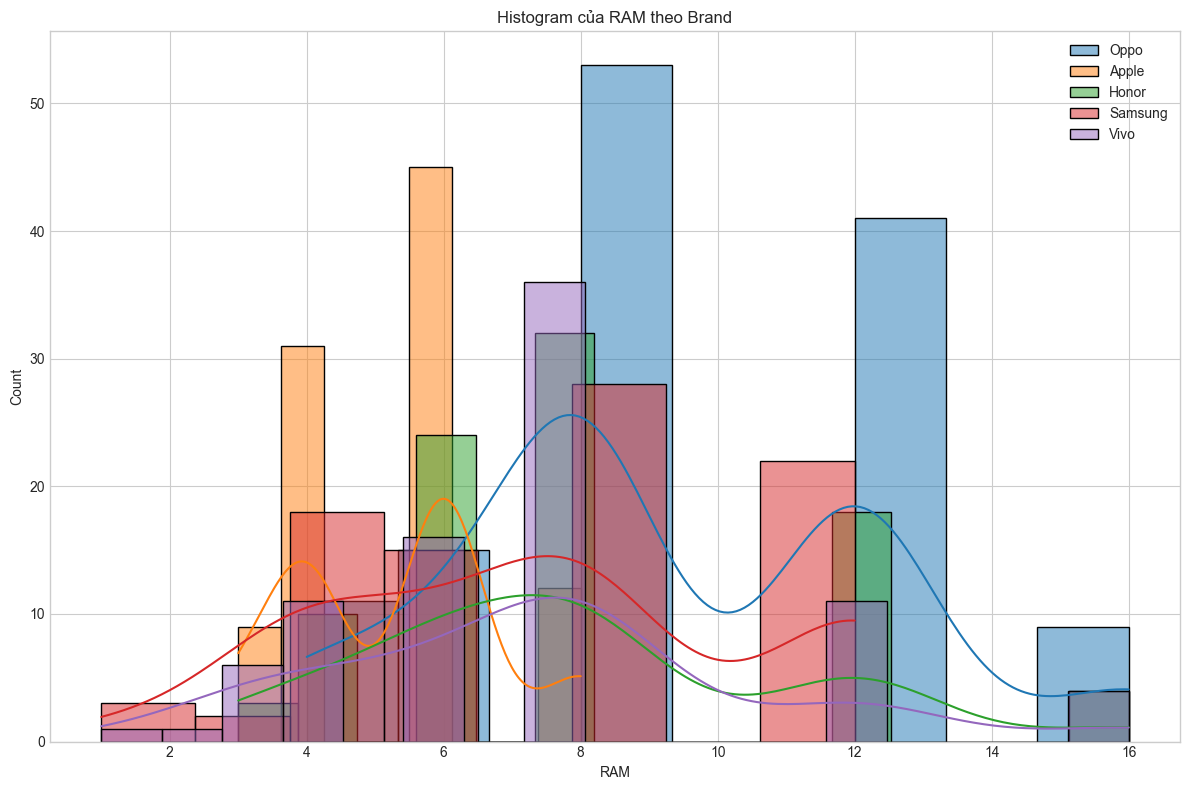

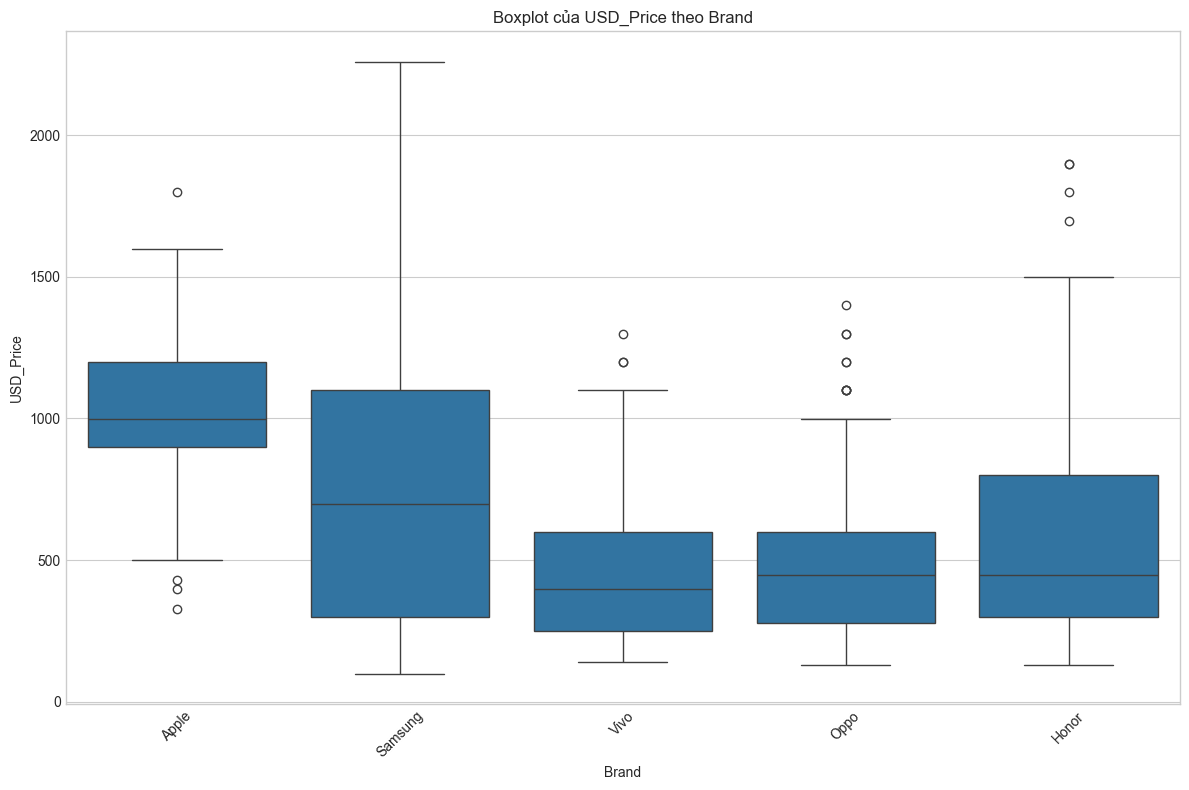

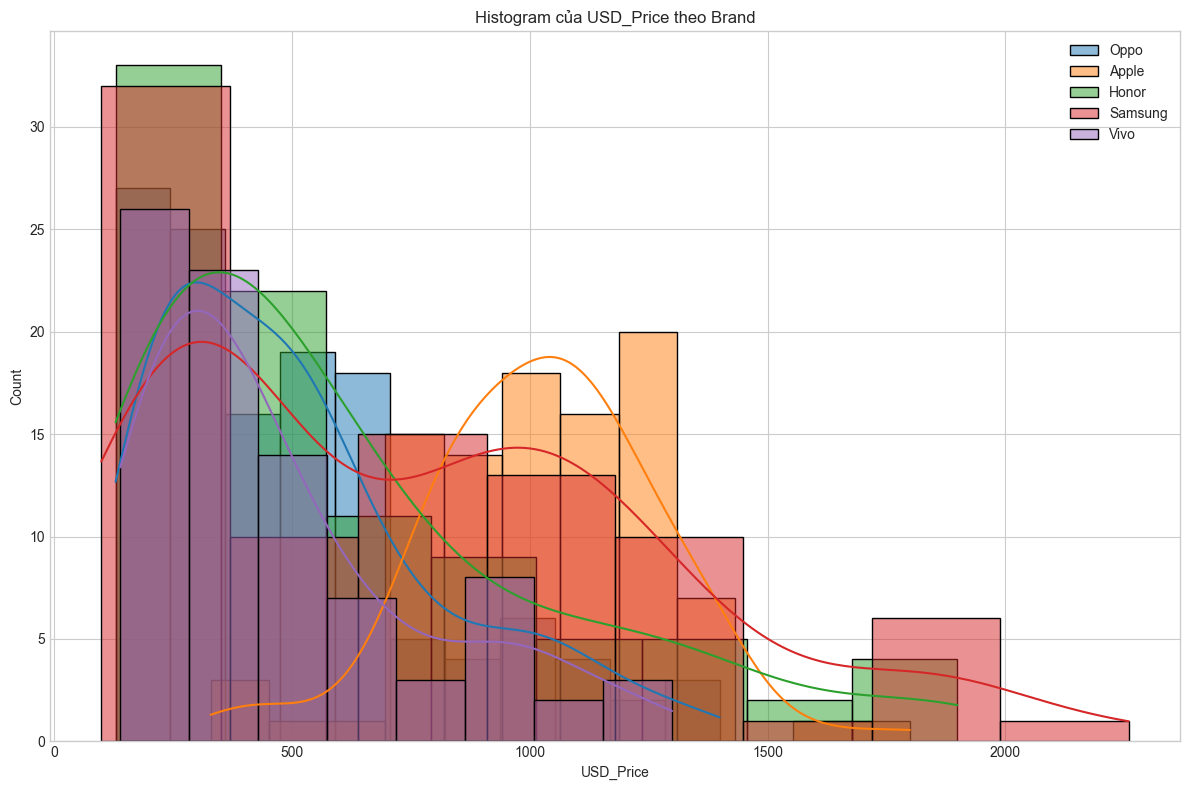

Đã tạo các biểu đồ phân nhóm và lưu trong thư mục 'visualizations'


In [41]:
# 2.1.2. Biểu đồ theo nhóm
def visualize_grouped_data(df, group_by_col, numeric_cols):
    # Lấy tối đa 5 nhóm phổ biến nhất để biểu đồ rõ ràng
    top_groups = df[group_by_col].value_counts().nlargest(5).index.tolist()
    df_subset = df[df[group_by_col].isin(top_groups)]
    
    for num_col in numeric_cols:
        # Boxplot theo nhóm
        plt.figure(figsize=(12, 8))
        sns.boxplot(x=group_by_col, y=num_col, data=df_subset)
        plt.title(f'Boxplot của {num_col} theo {group_by_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        plt.close()
        
        # Histogram theo nhóm
        plt.figure(figsize=(12, 8))
        for group_val in top_groups:
            subset = df_subset[df_subset[group_by_col] == group_val]
            sns.histplot(subset[num_col], kde=True, label=str(group_val))
        plt.legend()
        plt.title(f'Histogram của {num_col} theo {group_by_col}')
        plt.tight_layout()
        plt.show()
        plt.close()

# Phân nhóm theo Brand
group_by_col = 'Brand'  # Thuộc tính danh nghĩa
numeric_cols = ['Weight', 'RAM', 'USD_Price']  # Các thuộc tính số
visualize_grouped_data(df_cleaned, group_by_col, numeric_cols)

print("Đã tạo các biểu đồ phân nhóm và lưu trong thư mục 'visualizations'")

## 2.1.3. Đo lường tương đồng và khác biệt
Tính ma trận tương quan và khoảng cách Cosine giữa một số dòng dữ liệu

=== 2.1.3. Đo lường sự tương đồng và khác biệt ===

1. Ma trận tương quan Pearson:
               Weight       RAM   Battery  ScreenSize  USD_Price  FrontCamera  \
Weight       1.000000 -0.008053  0.182396    0.975893   0.104919    -0.282998   
RAM         -0.008053  1.000000  0.085377    0.046496   0.108599     0.459337   
Battery      0.182396  0.085377  1.000000    0.169525   0.092623     0.000231   
ScreenSize   0.975893  0.046496  0.169525    1.000000   0.095838    -0.224008   
USD_Price    0.104919  0.108599  0.092623    0.095838   1.000000    -0.004195   
FrontCamera -0.282998  0.459337  0.000231   -0.224008  -0.004195     1.000000   
RearCamera  -0.308455  0.439794  0.026439   -0.263217  -0.014021     0.449008   

             RearCamera  
Weight        -0.308455  
RAM            0.439794  
Battery        0.026439  
ScreenSize    -0.263217  
USD_Price     -0.014021  
FrontCamera    0.449008  
RearCamera     1.000000  


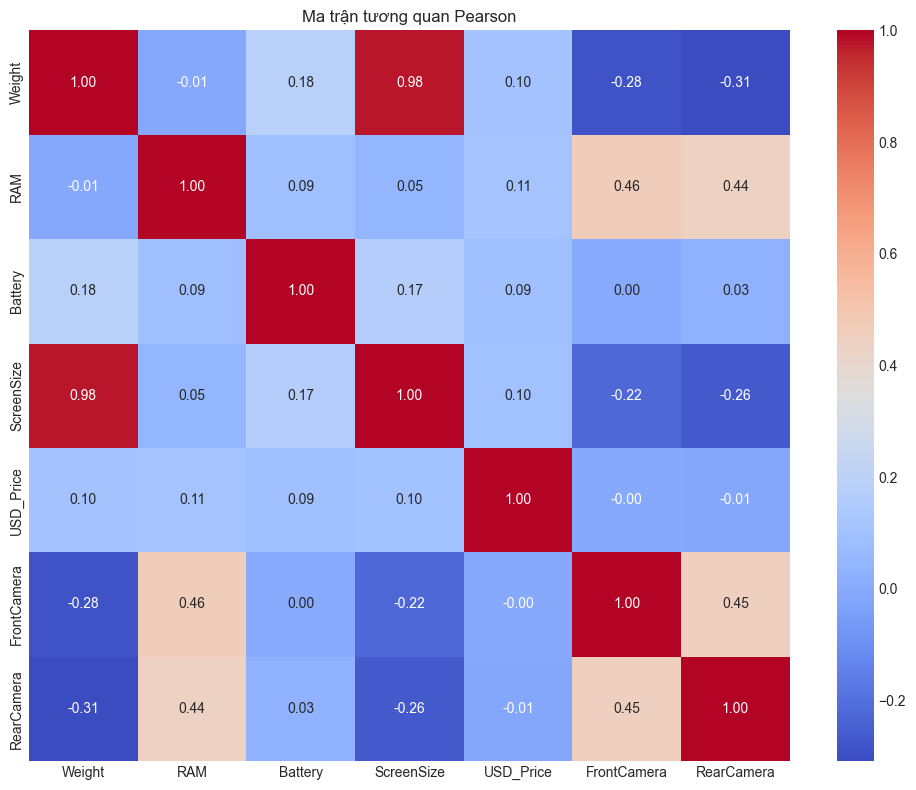


2. Ma trận độ tương đồng Cosin cho 4 mẫu:

Các mẫu được chọn:
Mẫu 0: Apple iPhone 16 128GB
Mẫu 1: Apple iPhone 16 256GB
Mẫu 2: Apple iPhone 16 512GB
Mẫu 3: Apple iPhone 16 Plus 128GB

Ma trận độ tương đồng Cosin:
          Mẫu 0     Mẫu 1     Mẫu 2     Mẫu 3
Mẫu 0  1.000000  0.769800 -0.149071 -0.769800
Mẫu 1  0.769800  1.000000  0.516398 -1.000000
Mẫu 2 -0.149071  0.516398  1.000000 -0.516398
Mẫu 3 -0.769800 -1.000000 -0.516398  1.000000


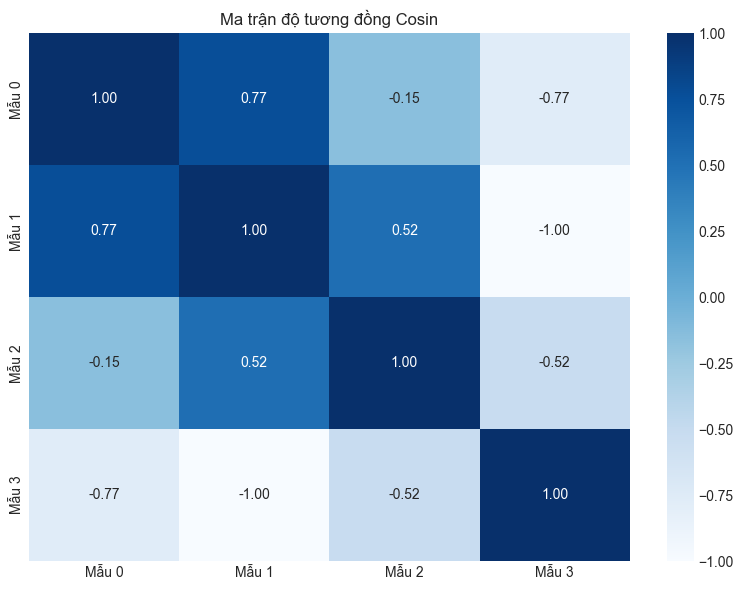


3. So sánh hai phương pháp đo lường:
a) Ma trận tương quan Pearson:
- Đo mức độ tương quan tuyến tính giữa các thuộc tính
- Giá trị từ -1 đến 1
- Phù hợp để tìm mối quan hệ giữa các thuộc tính

b) Độ đo Cosin:
- Đo độ tương đồng giữa các mẫu dữ liệu
- Giá trị từ -1 đến 1 (với dữ liệu đã chuẩn hóa)
- Phù hợp để so sánh độ tương đồng giữa các sản phẩm


In [42]:
# Bước 7: Đo lường sự tương đồng và khác biệt (2.1.3)
import scipy.spatial.distance as distance
import numpy as np

def calculate_similarity_measures(df, sample_rows):
    print("=== 2.1.3. Đo lường sự tương đồng và khác biệt ===")
    
    # 1. Tính ma trận tương quan cho các thuộc tính số
    numeric_cols = ['Weight', 'RAM', 'Battery', 'ScreenSize', 'USD_Price', 'FrontCamera', 'RearCamera']
    correlation_data = df[numeric_cols].copy()
    
    # Tính và hiển thị ma trận tương quan
    correlation_matrix = correlation_data.corr()
    print("\n1. Ma trận tương quan Pearson:")
    print(correlation_matrix)
    
    # Vẽ heatmap cho ma trận tương quan
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Ma trận tương quan Pearson')
    plt.tight_layout()
    plt.show()
    plt.close()
    
    # 2. Tính độ đo Cosin cho 4 dòng dữ liệu mẫu
    sample_data = df.loc[sample_rows, numeric_cols].copy()
    
    # Chuyển đổi dữ liệu sang kiểu số
    for col in numeric_cols:
        sample_data[col] = pd.to_numeric(sample_data[col], errors='coerce')
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    sample_data_scaled = pd.DataFrame(
        scaler.fit_transform(sample_data),
        index=sample_data.index,
        columns=sample_data.columns
    )
    
    # Tính ma trận độ tương đồng Cosin
    cosine_matrix = np.zeros((len(sample_rows), len(sample_rows)))
    
    for i in range(len(sample_rows)):
        for j in range(len(sample_rows)):
            if i == j:
                cosine_matrix[i][j] = 1.0
            else:
                vec1 = sample_data_scaled.iloc[i].values
                vec2 = sample_data_scaled.iloc[j].values
                # Tính cosine similarity
                dot_product = np.dot(vec1, vec2)
                norm1 = np.linalg.norm(vec1)
                norm2 = np.linalg.norm(vec2)
                if norm1 * norm2 != 0:
                    cosine_matrix[i][j] = dot_product / (norm1 * norm2)
                else:
                    cosine_matrix[i][j] = 0
    
    # Chuyển ma trận numpy thành DataFrame
    cosine_df = pd.DataFrame(
        cosine_matrix,
        index=[f'Mẫu {i}' for i in range(len(sample_rows))],
        columns=[f'Mẫu {i}' for i in range(len(sample_rows))]
    )
    
    print("\n2. Ma trận độ tương đồng Cosin cho 4 mẫu:")
    print("\nCác mẫu được chọn:")
    for i, idx in enumerate(sample_rows):
        print(f"Mẫu {i}: {df.loc[idx, 'Brand']} {df.loc[idx, 'Model']}")
    
    print("\nMa trận độ tương đồng Cosin:")
    print(cosine_df)
    
    # Vẽ heatmap cho ma trận độ tương đồng Cosin
    plt.figure(figsize=(8, 6))
    sns.heatmap(cosine_df, annot=True, cmap='Blues', fmt=".2f")
    plt.title('Ma trận độ tương đồng Cosin')
    plt.tight_layout()
    plt.show()
    plt.close()
    
    # So sánh hai phương pháp
    print("\n3. So sánh hai phương pháp đo lường:")
    print("a) Ma trận tương quan Pearson:")
    print("- Đo mức độ tương quan tuyến tính giữa các thuộc tính")
    print("- Giá trị từ -1 đến 1")
    print("- Phù hợp để tìm mối quan hệ giữa các thuộc tính")
    
    print("\nb) Độ đo Cosin:")
    print("- Đo độ tương đồng giữa các mẫu dữ liệu")
    print("- Giá trị từ -1 đến 1 (với dữ liệu đã chuẩn hóa)")
    print("- Phù hợp để so sánh độ tương đồng giữa các sản phẩm")
    
    return correlation_matrix, cosine_df

# Chọn 4 dòng đầu tiên để phân tích
sample_rows = df_cleaned.index[:4].tolist()

# Tính toán và so sánh
correlation_matrix, cosine_matrix = calculate_similarity_measures(df_cleaned, sample_rows)

## 2.2. Tiền xử lý bằng mã Python (Đã thực hiện ở trên)

### 📊 Thống kê mô tả giá theo Brand

In [43]:

df_cleaned.groupby("Brand")["USD_Price"].describe()


,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Apple,97.0,1028.484536,247.896867,329.0,899.0,999.0,1199.00,1799.0
Google,21.0,755.190476,345.839214,349.0,499.0,699.0,899.00,1799.0
Honor,91.0,607.571429,440.569257,129.0,299.0,449.0,799.00,1899.0
Huawei,42.0,1116.571429,672.511062,399.0,611.5,999.0,1274.00,2799.0
Infinix,56.0,245.071429,104.805943,79.0,159.0,219.0,321.50,549.0
Lenovo,15.0,311.666667,154.710175,149.0,199.0,249.0,454.00,599.0
Motorola,62.0,433.258065,295.592206,149.0,255.0,349.0,486.75,1499.0
Nokia,11.0,3760.181818,11894.076062,119.0,149.0,169.0,209.00,39622.0
OnePlus,53.0,608.622642,231.025825,179.0,399.0,649.0,799.00,1099.0


## 2.3. Tổng hợp dữ liệu theo nhóm `Brand`

In [44]:

# Tổng hợp thống kê theo thương hiệu
brand_summary = df_cleaned.groupby("Brand")["USD_Price"].describe()
brand_summary


,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Apple,97.0,1028.484536,247.896867,329.0,899.0,999.0,1199.00,1799.0
Google,21.0,755.190476,345.839214,349.0,499.0,699.0,899.00,1799.0
Honor,91.0,607.571429,440.569257,129.0,299.0,449.0,799.00,1899.0
Huawei,42.0,1116.571429,672.511062,399.0,611.5,999.0,1274.00,2799.0
Infinix,56.0,245.071429,104.805943,79.0,159.0,219.0,321.50,549.0
Lenovo,15.0,311.666667,154.710175,149.0,199.0,249.0,454.00,599.0
Motorola,62.0,433.258065,295.592206,149.0,255.0,349.0,486.75,1499.0
Nokia,11.0,3760.181818,11894.076062,119.0,149.0,169.0,209.00,39622.0
OnePlus,53.0,608.622642,231.025825,179.0,399.0,649.0,799.00,1099.0


## 2.4. Trực quan hóa dữ liệu (Đã có trong phần 2.1)

# 🧠 PHẦN 2.5: KHAI PHÁ DỮ LIỆU

## 2.5.1. Phương pháp 1 – Khai phá luật kết hợp (Apriori)

Bắt đầu khai phá luật kết hợp...

Kiểm tra dữ liệu trước khi mã hóa:

Brand - Giá trị duy nhất:
Brand
Oppo        129
Apple        97
Honor        91
Samsung      88
Vivo         86
Realme       69
Motorola     62
Infinix      56
OnePlus      53
Huawei       42
Tecno        39
POCO         30
Xiaomi       27
Google       21
Lenovo       15
Nokia        11
Sony          9
iQOO          3
Poco          2
Name: count, dtype: int64

RAM_Category - Giá trị duy nhất:
RAM_Category
Medium_RAM    516
High_RAM      194
Low_RAM       189
Ultra_RAM      31
Name: count, dtype: int64

Price_Category - Giá trị duy nhất:
Price_Category
Mid_range        389
Premium          252
Budget           150
Ultra_Premium    139
Name: count, dtype: int64

Screen_Category - Giá trị duy nhất:
Screen_Category
Large          536
Medium         232
Extra_Large    127
Small           35
Name: count, dtype: int64

Battery_Category - Giá trị duy nhất:
Battery_Category
Small_Battery     622
Large_Battery     198
Ultra_Ba

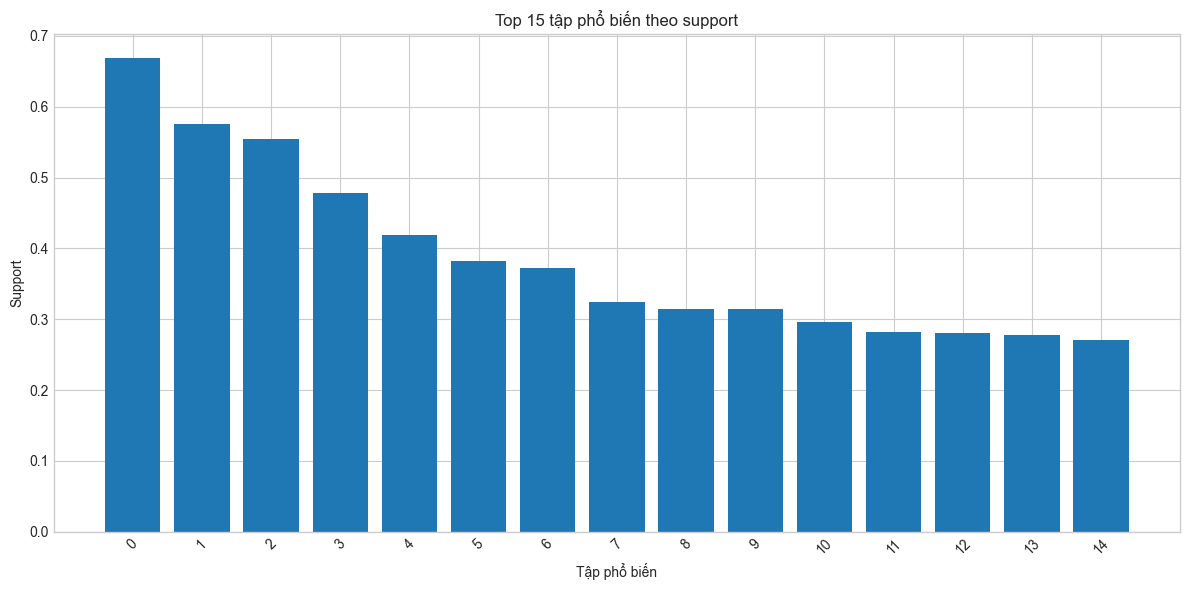


Sinh ra các luật kết hợp (min_confidence=0.5)...
Tìm thấy 106 luật kết hợp.

Top 10 luật kết hợp (sắp xếp theo lift):
Luật 10: frozenset({'RAM_Category_Low_RAM'}) => frozenset({'Price_Category_Budget'})
  Support: 0.117, Confidence: 0.577, Lift: 3.576
Luật 11: frozenset({'Price_Category_Budget'}) => frozenset({'RAM_Category_Low_RAM'})
  Support: 0.117, Confidence: 0.727, Lift: 3.576
Luật 44: frozenset({'Brand_Apple'}) => frozenset({'HighEnd', 'Battery_Category_Small_Battery'})
  Support: 0.101, Confidence: 0.969, Lift: 3.277
Luật 65: frozenset({'Price_Category_Ultra_Premium'}) => frozenset({'HighEnd', 'Battery_Category_Small_Battery'})
  Support: 0.106, Confidence: 0.712, Lift: 2.409
Luật 48: frozenset({'Price_Category_Premium'}) => frozenset({'HighEnd', 'RAM_Category_Medium_RAM'})
  Support: 0.140, Confidence: 0.516, Lift: 2.171
Luật 47: frozenset({'HighEnd', 'RAM_Category_Medium_RAM'}) => frozenset({'Price_Category_Premium'})
  Support: 0.140, Confidence: 0.588, Lift: 2.171
Luật 57:

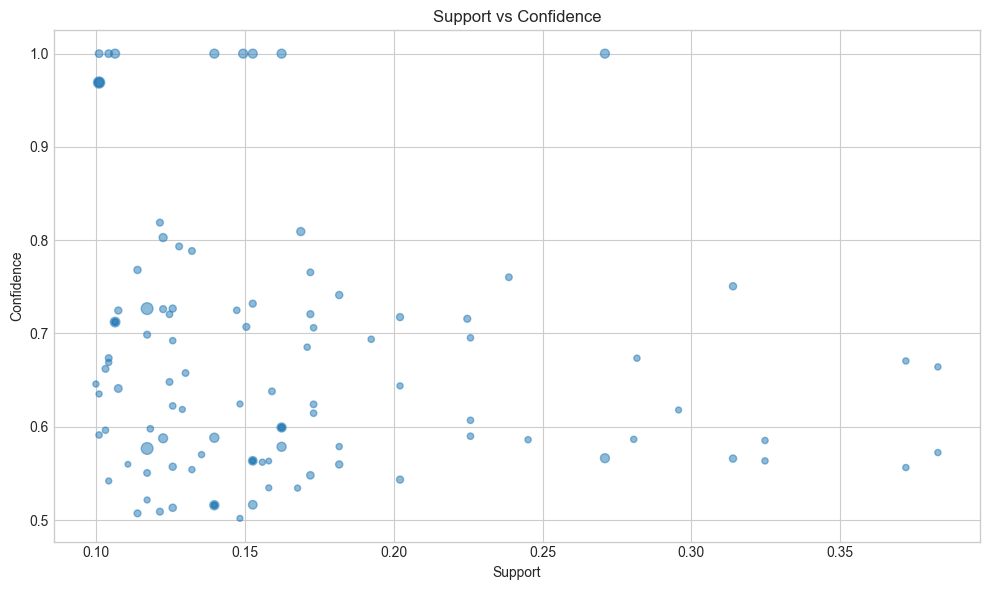

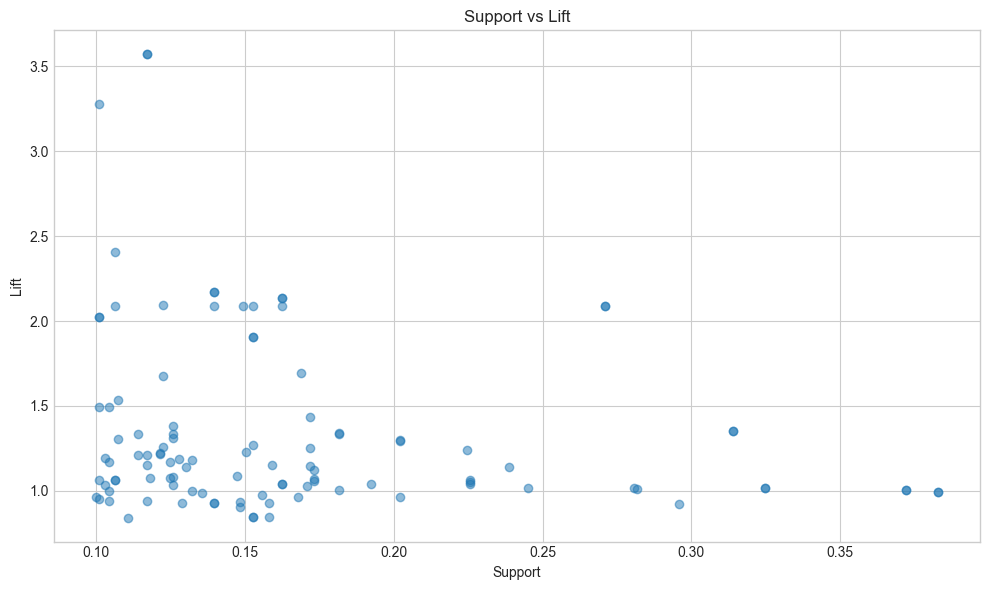


Đã hoàn thành khai phá luật kết hợp.


In [45]:
# 2.5.1. Phương pháp 1: Khai phá luật kết hợp
from mlxtend.frequent_patterns import apriori, association_rules

def mine_association_rules(df):
    # Chuẩn bị dữ liệu
    df_rules = df.copy()
    
    # Tạo cột HighEnd dựa trên giá
    df_rules['HighEnd'] = np.where(df_rules['USD_Price'] > df_rules['USD_Price'].median(), 1, 0)
    
    # Phân loại RAM thành các nhóm
    df_rules['RAM_Category'] = pd.cut(
        df_rules['RAM'], 
        bins=[0, 4, 8, 12, float('inf')], 
        labels=['Low_RAM', 'Medium_RAM', 'High_RAM', 'Ultra_RAM']
    )
    
    # Phân loại giá thành các nhóm
    df_rules['Price_Category'] = pd.cut(
        df_rules['USD_Price'], 
        bins=[0, 200, 500, 1000, float('inf')], 
        labels=['Budget', 'Mid_range', 'Premium', 'Ultra_Premium']
    )
    
    # Phân loại kích thước màn hình
    df_rules['Screen_Category'] = pd.cut(
        df_rules['ScreenSize'], 
        bins=[0, 6, 6.5, 7, float('inf')], 
        labels=['Small', 'Medium', 'Large', 'Extra_Large']
    )
    
    # Phân loại dung lượng pin
    df_rules['Battery_Category'] = pd.cut(
        df_rules['Battery'], 
        bins=[0, 3000, 4000, 5000, float('inf')], 
        labels=['Small_Battery', 'Medium_Battery', 'Large_Battery', 'Ultra_Battery']
    )
    
    # Phân loại năm phát hành
    df_rules['Release_Category'] = pd.cut(
        df_rules['ReleaseYear'], 
        bins=[2020, 2022, 2023, 2024, 2025], 
        labels=['Old', 'Previous_Year', 'Current_Year', 'New']
    )
    
    # Chọn các thuộc tính phân loại để tìm luật kết hợp
    categorical_cols = ['Brand', 'RAM_Category', 'Price_Category', 'Screen_Category', 
                       'Battery_Category', 'Release_Category', 'HighEnd']
    
    # Kiểm tra dữ liệu trước khi one-hot encoding
    print("\nKiểm tra dữ liệu trước khi mã hóa:")
    for col in categorical_cols:
        print(f"\n{col} - Giá trị duy nhất:")
        print(df_rules[col].value_counts())
    
    # One-hot encoding
    df_encoded = pd.get_dummies(df_rules[categorical_cols])
    
    # Chuyển về dạng boolean
    for col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype(bool)
    
    print("\nDữ liệu sau khi biến đổi (5 dòng đầu):")
    print(df_encoded.head())
    
    # Áp dụng thuật toán Apriori để tìm các tập phổ biến
    print("\nTìm các tập phổ biến (min_support=0.1)...")
    frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
    
    if frequent_itemsets.empty:
        print("Không tìm thấy tập phổ biến nào. Thử giảm min_support...")
        frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
    
    if not frequent_itemsets.empty:
        print(f"Tìm thấy {len(frequent_itemsets)} tập phổ biến.")
        print("\nTop 10 tập phổ biến (sắp xếp theo support):")
        print(frequent_itemsets.sort_values('support', ascending=False).head(10))
        
        # Vẽ biểu đồ các tập phổ biến theo support
        plt.figure(figsize=(12, 6))
        top_frequent = frequent_itemsets.sort_values('support', ascending=False).head(15)
        plt.bar(range(len(top_frequent)), top_frequent['support'])
        plt.xlabel('Tập phổ biến')
        plt.ylabel('Support')
        plt.title('Top 15 tập phổ biến theo support')
        plt.xticks(range(len(top_frequent)), [str(x) for x in range(len(top_frequent))], rotation=45)
        plt.tight_layout()
        plt.show()
        plt.close()
        
        # Sinh ra các luật kết hợp
        print("\nSinh ra các luật kết hợp (min_confidence=0.5)...")
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
        
        if rules.empty:
            print("Không tìm thấy luật kết hợp nào. Thử giảm min_threshold...")
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
        
        if not rules.empty:
            print(f"Tìm thấy {len(rules)} luật kết hợp.")
            
            # Top 10 luật theo lift
            print("\nTop 10 luật kết hợp (sắp xếp theo lift):")
            rules_by_lift = rules.sort_values('lift', ascending=False).head(10)
            for i, row in rules_by_lift.iterrows():
                print(f"Luật {i+1}: {row['antecedents']} => {row['consequents']}")
                print(f"  Support: {row['support']:.3f}, Confidence: {row['confidence']:.3f}, Lift: {row['lift']:.3f}")
            
            # Top 10 luật theo confidence
            print("\nTop 10 luật kết hợp (sắp xếp theo confidence):")
            rules_by_conf = rules.sort_values('confidence', ascending=False).head(10)
            for i, row in rules_by_conf.iterrows():
                print(f"Luật {i+1}: {row['antecedents']} => {row['consequents']}")
                print(f"  Support: {row['support']:.3f}, Confidence: {row['confidence']:.3f}, Lift: {row['lift']:.3f}")
            
            # Vẽ biểu đồ scatter plot cho support vs confidence
            plt.figure(figsize=(10, 6))
            plt.scatter(rules['support'], rules['confidence'], alpha=0.5, s=rules['lift']*20)
            plt.xlabel('Support')
            plt.ylabel('Confidence')
            plt.title('Support vs Confidence')
            plt.tight_layout()
            plt.show()
            plt.close()
            
            # Vẽ biểu đồ scatter plot cho support vs lift
            plt.figure(figsize=(10, 6))
            plt.scatter(rules['support'], rules['lift'], alpha=0.5)
            plt.xlabel('Support')
            plt.ylabel('Lift')
            plt.title('Support vs Lift')
            plt.tight_layout()
            plt.show()
            plt.close()
            
            return rules
        else:
            print("Không tìm thấy luật kết hợp nào sau khi giảm ngưỡng min_threshold.")
            return None
    else:
        print("Không tìm thấy tập phổ biến nào sau khi giảm ngưỡng min_support.")
        return None

# Thực hiện khai phá luật kết hợp
print("Bắt đầu khai phá luật kết hợp...")
association_rules_result = mine_association_rules(df_cleaned)

if association_rules_result is not None:
    print("\nĐã hoàn thành khai phá luật kết hợp.")
else:
    print("\nKhông tìm thấy luật kết hợp thỏa mãn. Có thể cần điều chỉnh tham số hoặc dữ liệu.")

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 🟢 Tạo cột nhãn IsCheap nếu chưa có
df_cleaned['IsCheap'] = df_cleaned['USD_Price'] < 300

# 🧠 Đặc trưng và nhãn
X = df_cleaned[['RAM', 'Weight', 'FrontCamera', 'RearCamera']]
y = df_cleaned['IsCheap']

# 🛠 Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Huấn luyện mô hình
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 🎯 Dự đoán
y_pred = model.predict(X_test)

### 🧾 Classification Report dưới dạng bảng

In [47]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report_dict).transpose()

,precision,recall,f1-score,support
False,0.869231,0.896825,0.882812,126.00000
True,0.767857,0.716667,0.741379,60.00000
accuracy,0.838710,0.838710,0.838710,0.83871
macro avg,0.818544,0.806746,0.812096,186.00000
weighted avg,0.836530,0.838710,0.837189,186.00000


## 🔍 Phân lớp và đánh giá mô hình (Random Forest + Classification Report)

== Classification Report ==
              precision    recall  f1-score   support

       False       0.87      0.90      0.89       126
        True       0.78      0.72      0.75        60

    accuracy                           0.84       186
   macro avg       0.83      0.81      0.82       186
weighted avg       0.84      0.84      0.84       186


== Confusion Matrix ==
[[114  12]
 [ 17  43]]
AUC Score: 0.9172


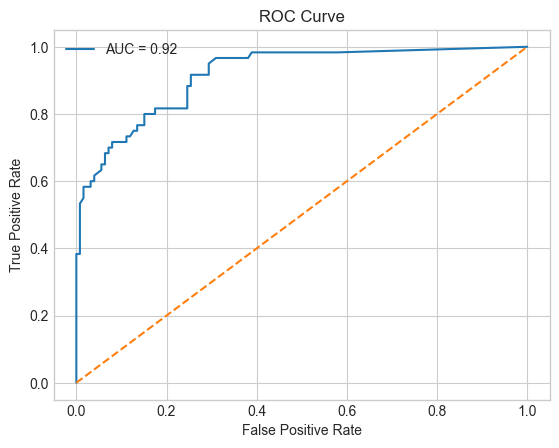

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Tạo nhãn mới theo mức giá
df_cleaned['IsCheap'] = df_cleaned['USD_Price'] < 300

# Đặc trưng và nhãn
X = df_cleaned[['RAM', 'Weight', 'FrontCamera', 'RearCamera']]
y = df_cleaned['IsCheap']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
print("== Classification Report ==")
print(classification_report(y_test, y_pred))

print("\n== Confusion Matrix ==")
print(confusion_matrix(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 2.5.1. Phương pháp 3 – Phân cụm (KMeans + PCA)

Bắt đầu phân tích phân cụm...


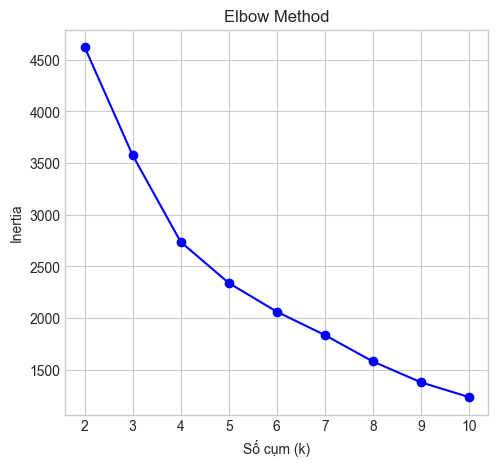

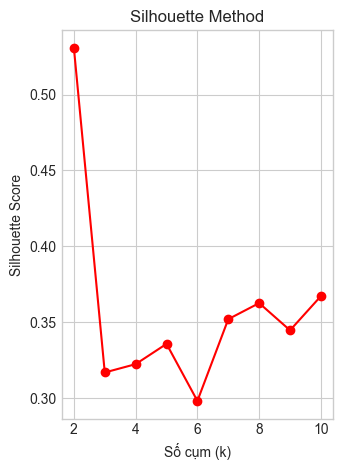


Số cụm tối ưu dựa trên Silhouette Score: 2

Phân tích đặc điểm của 2 cụm:

Cụm 0 (Số lượng: 831):
Weight          193.753791
RAM               7.903730
Battery        1574.963899
ScreenSize        6.589422
USD_Price       588.582022
FrontCamera      19.357401
RearCamera       50.600481
dtype: float64

Cụm 1 (Số lượng: 99):
Weight          517.969697
RAM               6.777778
Battery        2876.707071
ScreenSize       11.233535
USD_Price       935.535354
FrontCamera       8.050505
RearCamera       14.545455
dtype: float64

Tiến hành giảm chiều dữ liệu bằng PCA để trực quan hóa...


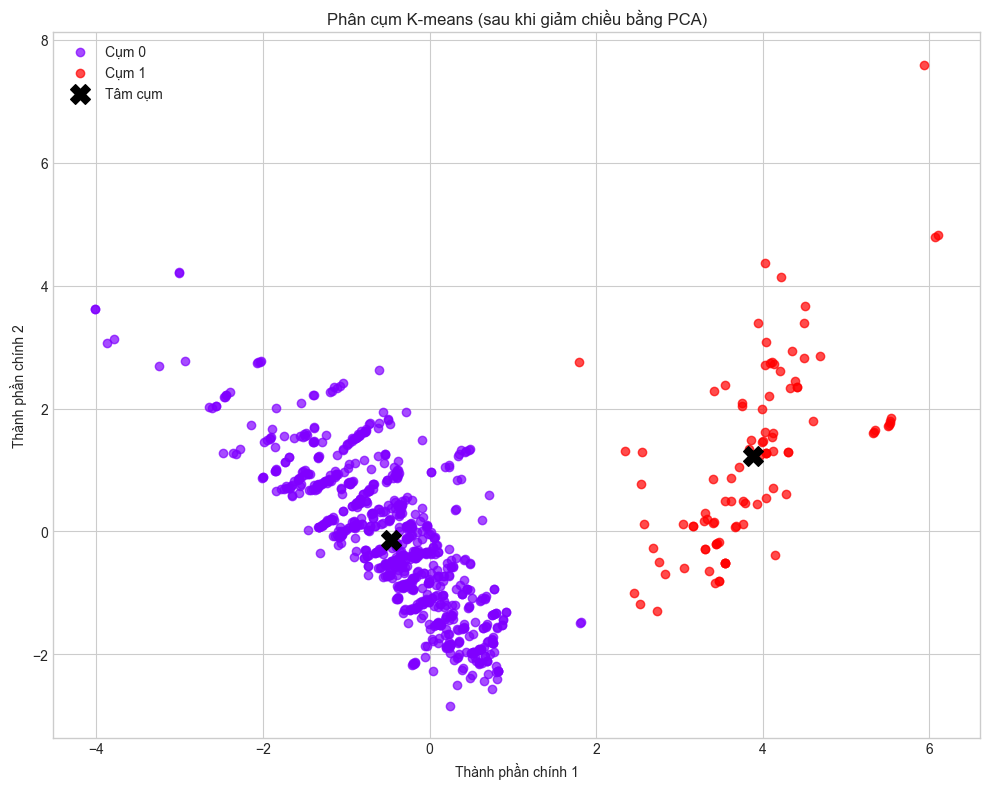


Silhouette Score cho 2 cụm: 0.5307


<Figure size 1500x800 with 0 Axes>

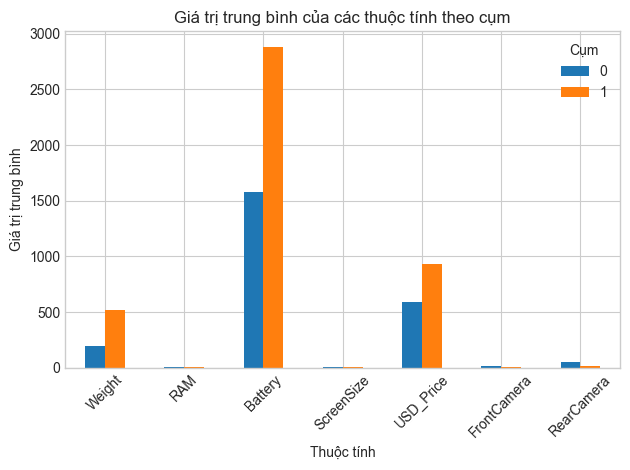


Phân tích phân cụm:

Số lượng điện thoại trong mỗi cụm:
Cluster
0    831
1     99
Name: count, dtype: int64

Đã hoàn thành phân cụm với 2 cụm.


In [49]:
# 2.5.1. Phương pháp 3: Phân cụm (đã sửa)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

def clustering_analysis(df):
    # Chuẩn bị dữ liệu
    df_cluster = df.copy()
    
    # Chọn các thuộc tính số để phân cụm
    num_features = ['Weight', 'RAM', 'Battery', 'ScreenSize', 'USD_Price', 'FrontCamera', 'RearCamera']
    
    # Điền giá trị thiếu bằng median
    for col in num_features:
        df_cluster[col] = df_cluster[col].fillna(df_cluster[col].median())
    
    X = df_cluster[num_features]
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Tìm số cụm tối ưu bằng Elbow method
    inertia = []
    silhouette_scores = []
    k_range = range(2, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
        
        # Tính silhouette score cho mỗi k
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X_scaled, labels))
    
    # Vẽ biểu đồ Elbow method
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertia, 'bo-')
    plt.xlabel('Số cụm (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()
    
    # Sửa lỗi: đảm bảo k_range và silhouette_scores có cùng kích thước
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, 'ro-')  # Bỏ [:-1]
    plt.xlabel('Số cụm (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    
    plt.tight_layout()
    plt.show()
    plt.close()
    
    # Tìm số cụm tối ưu dựa trên Silhouette score cao nhất
    optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
    print(f"\nSố cụm tối ưu dựa trên Silhouette Score: {optimal_k}")
    
    # Áp dụng K-means với số cụm tối ưu
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Thêm nhãn cụm vào dataframe
    df_cluster['Cluster'] = cluster_labels
    
    # Phân tích đặc điểm của từng cụm
    print(f"\nPhân tích đặc điểm của {optimal_k} cụm:")
    for i in range(optimal_k):
        cluster_data = df_cluster[df_cluster['Cluster'] == i]
        print(f"\nCụm {i} (Số lượng: {len(cluster_data)}):")
        print(cluster_data[num_features].mean())
    
    # Vẽ biểu đồ phân bố các cụm
    print("\nTiến hành giảm chiều dữ liệu bằng PCA để trực quan hóa...")
    
    # Giảm chiều dữ liệu xuống 2D để vẽ
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Vẽ biểu đồ phân cụm
    plt.figure(figsize=(10, 8))
    
    # Màu sắc cho các cụm
    colors = plt.cm.rainbow(np.linspace(0, 1, optimal_k))
    
    for i in range(optimal_k):
        plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], 
                   color=colors[i], label=f'Cụm {i}', alpha=0.7)
    
    # Vẽ tâm của các cụm
    centers_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, c='black', marker='X', label='Tâm cụm')
    
    plt.title('Phân cụm K-means (sau khi giảm chiều bằng PCA)')
    plt.xlabel('Thành phần chính 1')
    plt.ylabel('Thành phần chính 2')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()
    
    # Đánh giá phân cụm
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"\nSilhouette Score cho {optimal_k} cụm: {silhouette_avg:.4f}")
    
    # Hiển thị đặc điểm nổi bật của các cụm
    # Tạo bảng so sánh giá trị trung bình của các cụm
    cluster_means = df_cluster.groupby('Cluster')[num_features].mean()
    
    # Vẽ biểu đồ so sánh các thuộc tính theo cụm
    plt.figure(figsize=(15, 8))
    cluster_means.T.plot(kind='bar')
    plt.title('Giá trị trung bình của các thuộc tính theo cụm')
    plt.xlabel('Thuộc tính')
    plt.ylabel('Giá trị trung bình')
    plt.legend(title='Cụm')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()
    
    # Phân tích và đánh giá phân cụm
    print("\nPhân tích phân cụm:")
    
    # So sánh tỷ lệ phân cụm
    cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
    print("\nSố lượng điện thoại trong mỗi cụm:")
    print(cluster_counts)
    
    # Vẽ biểu đồ tròn cho tỷ lệ phân cụm
    plt.figure(figsize=(8, 8))
    plt.pie(cluster_counts, labels=[f'Cụm {i}' for i in range(optimal_k)], 
            autopct='%1.1f%%', startangle=90, shadow=True)
    plt.title('Tỷ lệ các cụm')
    plt.axis('equal')
    plt.close()
    
    return kmeans, df_cluster, optimal_k

# Thực hiện phân cụm
print("Bắt đầu phân tích phân cụm...")
kmeans_model, clustered_data, optimal_k = clustering_analysis(df_cleaned)

print(f"\nĐã hoàn thành phân cụm với {optimal_k} cụm.")

## 2.5.2. Đánh giá mô hình phân lớp
- Sử dụng Confusion Matrix, Accuracy, Classification Report, AUC

In [50]:

# Xuất classification report (giả định y_test, y_pred có sẵn từ phân lớp)
print("== Classification Report ==")
print(classification_report(y_test, y_pred))


== Classification Report ==
              precision    recall  f1-score   support

       False       0.87      0.90      0.89       126
        True       0.78      0.72      0.75        60

    accuracy                           0.84       186
   macro avg       0.83      0.81      0.82       186
weighted avg       0.84      0.84      0.84       186



# ✅ PHẦN 3: KẾT LUẬN & ĐỀ XUẤT
- Tóm tắt toàn bộ quy trình phân tích và khai phá dữ liệu
- Nêu nhận xét, hạn chế và đề xuất cải tiến mô hình/dữ liệu


In [51]:
# Tổng kết và xuất kết quả
def summarize_results(df, association_rules_result, accuracy, optimal_k):
    print("\n========== TỔNG KẾT KẾT QUẢ ==========")
    
    print("\n1. Thông tin tổng quan về dữ liệu:")
    print(f"- Số lượng điện thoại: {len(df)}")
    print(f"- Số lượng thương hiệu: {df['Brand'].nunique()}")
    print(f"- Phạm vi giá (USD): ${df['USD_Price'].min()} - ${df['USD_Price'].max()}")
    print(f"- Năm sản xuất: {df['ReleaseYear'].min()} - {df['ReleaseYear'].max()}")
    
    print("\n2. Kết quả khai phá luật kết hợp:")
    if association_rules_result is not None:
        print(f"- Tìm thấy {len(association_rules_result)} luật kết hợp")
        print("- Các luật kết hợp có lift cao nhất có thể sử dụng để phát hiện các đặc điểm thường đi kèm với nhau")
    else:
        print("- Không tìm thấy luật kết hợp đáng kể")
    
    print("\n3. Kết quả phân lớp:")
    print(f"- Độ chính xác (Accuracy): {accuracy:.4f}")
    print("- Thuộc tính quan trọng nhất để dự đoán phân khúc giá có thể được sử dụng trong chiến lược định giá")
    
    print("\n4. Kết quả phân cụm:")
    print(f"- Số cụm tối ưu: {optimal_k}")
    print("- Mỗi cụm có thể đại diện cho một phân khúc thị trường với đặc điểm riêng")
    
    print("\n5. Kết luận:")
    print("- Phân tích này giúp hiểu rõ hơn về thị trường điện thoại di động")
    print("- Có thể sử dụng các thông tin này để định hướng phát triển sản phẩm và chiến lược kinh doanh")
    print("- Dữ liệu có thể được cập nhật định kỳ để theo dõi xu hướng thị trường")
    
    # Lưu tổng kết vào file
    with open('visualizations/summary.txt', 'w') as f:
        f.write("TỔNG KẾT KẾT QUẢ\n\n")
        
        f.write("1. Thông tin tổng quan về dữ liệu:\n")
        f.write(f"- Số lượng điện thoại: {len(df)}\n")
        f.write(f"- Số lượng thương hiệu: {df['Brand'].nunique()}\n")
        f.write(f"- Phạm vi giá (USD): ${df['USD_Price'].min()} - ${df['USD_Price'].max()}\n")
        f.write(f"- Năm sản xuất: {df['ReleaseYear'].min()} - {df['ReleaseYear'].max()}\n\n")
        
        f.write("2. Kết quả khai phá luật kết hợp:\n")
        if association_rules_result is not None:
            f.write(f"- Tìm thấy {len(association_rules_result)} luật kết hợp\n")
            f.write("- Các luật kết hợp có lift cao nhất có thể sử dụng để phát hiện các đặc điểm thường đi kèm với nhau\n\n")
        else:
            f.write("- Không tìm thấy luật kết hợp đáng kể\n\n")
        
        f.write("3. Kết quả phân lớp:\n")
        f.write(f"- Độ chính xác (Accuracy): {accuracy:.4f}\n")
        f.write("- Thuộc tính quan trọng nhất để dự đoán phân khúc giá có thể được sử dụng trong chiến lược định giá\n\n")
        
        f.write("4. Kết quả phân cụm:\n")
        f.write(f"- Số cụm tối ưu: {optimal_k}\n")
        f.write("- Mỗi cụm có thể đại diện cho một phân khúc thị trường với đặc điểm riêng\n\n")
        
        f.write("5. Kết luận:\n")
        f.write("- Phân tích này giúp hiểu rõ hơn về thị trường điện thoại di động\n")
        f.write("- Có thể sử dụng các thông tin này để định hướng phát triển sản phẩm và chiến lược kinh doanh\n")
        f.write("- Dữ liệu có thể được cập nhật định kỳ để theo dõi xu hướng thị trường\n")

# Sau khi dự đoán:
y_pred = model.predict(X_test)

# Thêm dòng này:
accuracy = accuracy_score(y_test, y_pred)

# Gọi hàm tổng kết
summarize_results(df_cleaned, association_rules_result, accuracy, optimal_k)

print("\nPhân tích dữ liệu hoàn tất. Kết quả đã được lưu trong thư mục 'visualizations'.")


========== TỔNG KẾT KẾT QUẢ ==========

1. Thông tin tổng quan về dữ liệu:
- Số lượng điện thoại: 930
- Số lượng thương hiệu: 19
- Phạm vi giá (USD): $79.0 - $39622.0
- Năm sản xuất: 2014 - 2025

2. Kết quả khai phá luật kết hợp:
- Tìm thấy 106 luật kết hợp
- Các luật kết hợp có lift cao nhất có thể sử dụng để phát hiện các đặc điểm thường đi kèm với nhau

3. Kết quả phân lớp:
- Độ chính xác (Accuracy): 0.8441
- Thuộc tính quan trọng nhất để dự đoán phân khúc giá có thể được sử dụng trong chiến lược định giá

4. Kết quả phân cụm:
- Số cụm tối ưu: 2
- Mỗi cụm có thể đại diện cho một phân khúc thị trường với đặc điểm riêng

5. Kết luận:
- Phân tích này giúp hiểu rõ hơn về thị trường điện thoại di động
- Có thể sử dụng các thông tin này để định hướng phát triển sản phẩm và chiến lược kinh doanh
- Dữ liệu có thể được cập nhật định kỳ để theo dõi xu hướng thị trường

Phân tích dữ liệu hoàn tất. Kết quả đã được lưu trong thư mục 'visualizations'.


### 📌 Nhận xét nhanh
- Dữ liệu phân bố không đồng đều, nhiều điện thoại thuộc nhóm giá dưới $300.
- Các thuộc tính như RAM và Camera có xu hướng tăng theo giá.